<a href="https://colab.research.google.com/github/gal-dmitry/HSE_RecSys/blob/master/HW_02/HW_02_COLAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://voudy-data.s3.eu-north-1.amazonaws.com/wsdm_data.tar.gz
!tar -xf /content/wsdm_data.tar.gz

--2021-11-27 17:10:47--  https://voudy-data.s3.eu-north-1.amazonaws.com/wsdm_data.tar.gz
Resolving voudy-data.s3.eu-north-1.amazonaws.com (voudy-data.s3.eu-north-1.amazonaws.com)... 52.95.171.32
Connecting to voudy-data.s3.eu-north-1.amazonaws.com (voudy-data.s3.eu-north-1.amazonaws.com)|52.95.171.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 613394184 (585M) [application/x-gzip]
Saving to: ‘wsdm_data.tar.gz’

wsdm_data.tar.gz    100%[===================>] 584.98M  11.1MB/s    in 67s     

2021-11-27 17:11:55 (8.74 MB/s) - ‘wsdm_data.tar.gz’ saved [613394184/613394184]



In [ ]:
!pip install catboost==1.0.3
!pip install gensim==4.1.0
!pip install --upgrade numpy

     |████████████████████████████████| 76.3 MB 1.5 MB/s 
     |████████████████████████████████| 24.0 MB 1.6 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
     |████████████████████████████████| 15.7 MB 5.4 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.4 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [96]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [97]:
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
# import sys
# sys.path.append("utils")

In [100]:
from data_processing import *
from train_utils import TrainDataset, CatBoostModel

## Dataset

### members.csv
#### user information.


- msno

- city

- bd: age. Note: this column has outlier values, please use your judgement.

- gender

- registered_via: registration method

- registration_init_time: format ```%Y%m%d```

- expiration_date: format ```%Y%m%d```


In [101]:
# csv_folder_path = "kkbox-music-recommendation-challenge/csv_folder"
csv_folder_path = "."

members_path = "members.csv"
song_extra_info_path = "song_extra_info.csv"
songs_path = "songs.csv"
train_path = "train.csv"

In [102]:
members_df = load_members(f"{csv_folder_path}/{members_path}")

members_df.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,2011-08-20,2017-09-20
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,2015-06-28,2017-06-22
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,2016-04-11,2017-07-12
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,2015-09-06,2015-09-07
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,2017-01-26,2017-06-13


In [103]:
members_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   msno                    34403 non-null  category      
 1   city                    34403 non-null  category      
 2   bd                      34403 non-null  uint8         
 3   gender                  14501 non-null  category      
 4   registered_via          34403 non-null  category      
 5   registration_init_time  34403 non-null  datetime64[ns]
 6   expiration_date         34403 non-null  datetime64[ns]
dtypes: category(4), datetime64[ns](2), uint8(1)
memory usage: 2.3 MB


In [104]:
show_unique_values(members_df)

Unique values:

msno: (34403,)
city: (21,)
bd: (94,)
gender: (3,)
registered_via: (6,)
registration_init_time: (3862,)
expiration_date: (1484,)


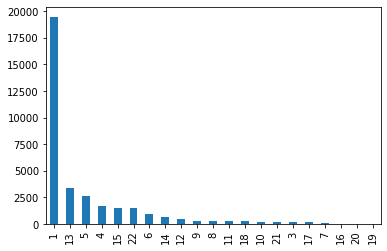

In [105]:
members_df.city.value_counts().plot(kind='bar')

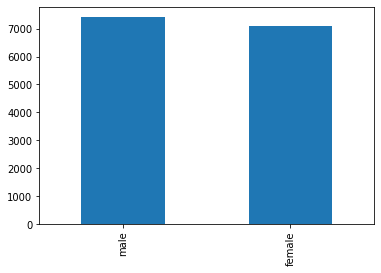

In [106]:
members_df.gender.value_counts().plot(kind='bar')

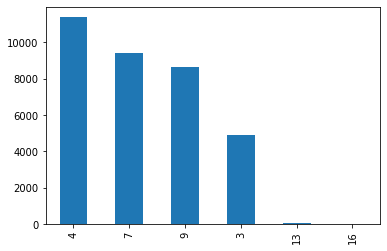

In [107]:
members_df.registered_via.value_counts().plot(kind='bar')

Unique ages: [  0   2   3   5   6   7  10  11  12  13  14  15  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  70  72  73  74  76  78  82
  83  85  87  89  90  93  95  96  97 101 102 103 105 106 107 111 112 131
 144 163 213 218]


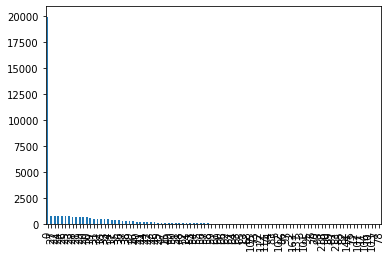

In [108]:
print(f"Unique ages: {np.sort(members_df.bd.unique())}")

members_df.bd.value_counts().plot(kind='bar')

In [109]:
members_df.expiration_date - members_df.registration_init_time

0       2223 days
1        725 days
2        457 days
3          1 days
4        138 days
           ...   
34398   1399 days
34399    937 days
34400   1498 days
34401    701 days
34402      3 days
Length: 34403, dtype: timedelta64[ns]

In [110]:
print(f"min registration: {members_df.registration_init_time.min()}")
print(f"max registration: {members_df.registration_init_time.max()}")

min registration: 2004-03-26 00:00:00
max registration: 2017-02-28 00:00:00


In [111]:
print(f"min expiration: {members_df.expiration_date.min()}")
print(f"max expiration: {members_df.expiration_date.max()}")

min expiration: 1970-01-01 00:00:00
max expiration: 2020-10-17 00:00:00


#### Выводы:

- bd: age. - Переведем в категориальный признак. Неестественным значениям присвоим категорию - "неизвестно"

- gender - Обработаем nan как неизвестный пол

- registration_init_time: format ```%Y%m%d``` - оставим 

- expiration_date: format ```%Y%m%d``` - ?


In [112]:
post_members_df = process_members(members_df)

post_members_df.head()

,msno,city,gender,registered_via,registration_init_time,expiration_date,age_group
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,FILL_NAN,7,2011-08-20,2017-09-20,FILL_NAN
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,FILL_NAN,7,2015-06-28,2017-06-22,FILL_NAN
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,FILL_NAN,4,2016-04-11,2017-07-12,FILL_NAN
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,FILL_NAN,9,2015-09-06,2015-09-07,FILL_NAN
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,FILL_NAN,4,2017-01-26,2017-06-13,FILL_NAN


In [113]:
post_members_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   msno                    34403 non-null  category      
 1   city                    34403 non-null  category      
 2   gender                  34403 non-null  category      
 3   registered_via          34403 non-null  category      
 4   registration_init_time  34403 non-null  datetime64[ns]
 5   expiration_date         34403 non-null  datetime64[ns]
 6   age_group               34403 non-null  category      
dtypes: category(5), datetime64[ns](2)
memory usage: 2.3 MB


---

### songs.csv
#### The songs. Note that data is in unicode.

- song_id

- song_length: in ms

- genre_ids: genre category. Some songs have multiple genres and they are separated by |

- artist_name

- composer

- lyricist

- language

In [114]:
song_df = load_songs(f"{csv_folder_path}/{songs_path}")

song_df.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [115]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype   
---  ------       -----   
 0   song_id      category
 1   song_length  int32   
 2   genre_ids    category
 3   artist_name  category
 4   composer     category
 5   lyricist     category
 6   language     category
dtypes: category(6), int32(1)
memory usage: 178.0 MB


In [116]:
show_unique_values(song_df)

Unique values:

song_id: (2296320,)
song_length: (146534,)
genre_ids: (1046,)
artist_name: (222363,)
composer: (329824,)
lyricist: (110926,)
language: (11,)


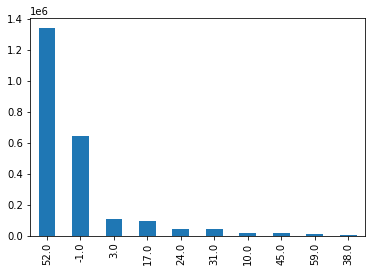

In [117]:
song_df.language.value_counts().plot(kind='bar')

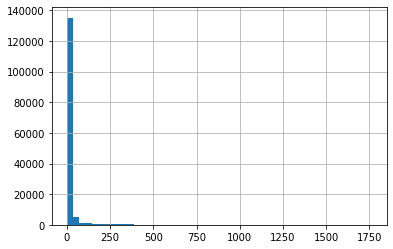

In [118]:
song_df.song_length.value_counts().hist(bins=50)

#### Выводы:

Для каждого из следующих признаков создадим новый признак, указывающий кол-во участников (жанров)
- genre_ids
- artist_name 
- composer
- lyricist

In [119]:
post_song_df = process_songs(song_df)

post_song_df.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language,genre_ids_count,artist_name_count,composer_count,lyricist_count
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0,1,1,1,1
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0,1,1,3,1
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,FILL_NAN,FILL_NAN,31.0,1,1,0,0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0,1,1,1,1
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0,1,1,1,1


In [120]:
post_song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 11 columns):
 #   Column             Dtype   
---  ------             -----   
 0   song_id            category
 1   song_length        int32   
 2   genre_ids          category
 3   artist_name        category
 4   composer           category
 5   lyricist           category
 6   language           category
 7   genre_ids_count    int64   
 8   artist_name_count  int64   
 9   composer_count     int64   
 10  lyricist_count     int64   
dtypes: category(6), int32(1), int64(4)
memory usage: 248.1 MB


In [121]:
post_song_df.isnull().any(axis=0)

song_id              False
song_length          False
genre_ids            False
artist_name          False
composer             False
lyricist             False
language             False
genre_ids_count      False
artist_name_count    False
composer_count       False
lyricist_count       False
dtype: bool

---

### song_extra_info.csv

- song_id

- song name - the name of the song.

- isrc - International Standard Recording Code, theoretically can be used as an identity of a song. However, what worth to note is, ISRCs generated from providers have not been officially verified; therefore the information in ISRC, such as country code and reference year, can be misleading/incorrect. Multiple songs could share one ISRC since a single recording could be re-published several times.

In [122]:
song_extra_info_df = load_song_extra_info(f"{csv_folder_path}/{song_extra_info_path}")

song_extra_info_df.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [123]:
song_extra_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295971 entries, 0 to 2295970
Data columns (total 3 columns):
 #   Column   Dtype   
---  ------   -----   
 0   song_id  category
 1   name     category
 2   isrc     object  
dtypes: category(2), object(1)
memory usage: 181.5+ MB


In [124]:
show_unique_values(song_extra_info_df)

Unique values:

song_id: (2295971,)
name: (1168980,)
isrc: (1806826,)


#### Выводы

- Парсинг isrc

- Убрать `name`

In [125]:
post_song_extra_info_df = process_song_extra_info(song_extra_info_df)

post_song_extra_info_df.head()

,song_id,isrc_country,isrc_year
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,"Taiwan, Province of China",2012
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,-1,2016
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,"Taiwan, Province of China",2008
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,United States,2013
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,"Taiwan, Province of China",2013


In [126]:
post_song_extra_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295971 entries, 0 to 2295970
Data columns (total 3 columns):
 #   Column        Dtype   
---  ------        -----   
 0   song_id       category
 1   isrc_country  category
 2   isrc_year     category
dtypes: category(3)
memory usage: 112.9 MB


In [127]:
post_song_extra_info_df.isnull().any()

song_id         False
isrc_country    False
isrc_year       False
dtype: bool

---

### train.csv

- msno: user id

- song_id: song id

- source_system_tab: the name of the tab where the event was triggered. System tabs are used to categorize KKBOX mobile apps functions. For example, tab my library contains functions to manipulate the local storage, and tab search contains functions relating to search.

- source_screen_name: name of the layout a user sees.

- source_type: an entry point a user first plays music on mobile apps. An entry point could be album, online-playlist, song .. etc.

- target: this is the target variable. ```target=1``` means there are recurring listening event(s) triggered within a month after the user’s very first observable listening event, ```target=0``` otherwise.

In [128]:
train_df = load_train(f"{csv_folder_path}/{train_path}")

train_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [129]:
show_unique_values(train_df)

Unique values:

msno: (30755,)
song_id: (359966,)
source_system_tab: (9,)
source_screen_name: (21,)
source_type: (13,)
target: (2,)


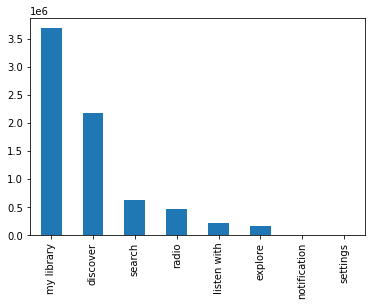

In [130]:
train_df.source_system_tab.value_counts().plot(kind='bar')

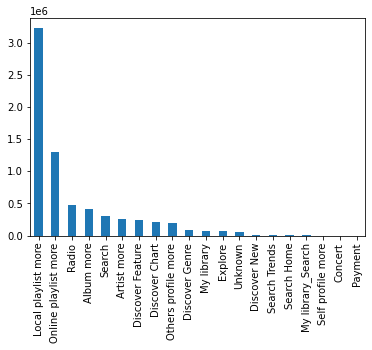

In [131]:
train_df.source_screen_name.value_counts().plot(kind='bar')

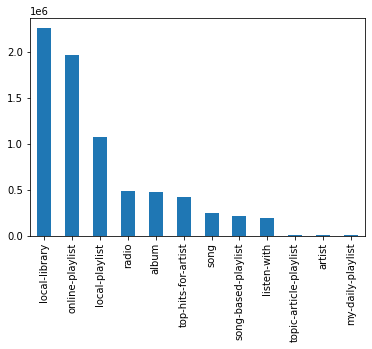

In [132]:
train_df.source_type.value_counts().plot(kind='bar')

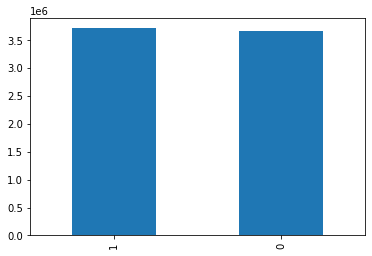

In [133]:
train_df.target.value_counts().plot(kind='bar')

In [134]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
 #   Column              Dtype   
---  ------              -----   
 0   msno                category
 1   song_id             category
 2   source_system_tab   category
 3   source_screen_name  category
 4   source_type         category
 5   target              uint8   
dtypes: category(5), uint8(1)
memory usage: 84.6 MB


In [135]:
train_df.isnull().any()

msno                  False
song_id               False
source_system_tab      True
source_screen_name     True
source_type            True
target                False
dtype: bool

In [136]:
post_train_df = process_train(train_df)

post_train_df.head()

100%|██████████| 3/3 [00:00<00:00, 20.02it/s]


,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [137]:
post_train_df.isnull().any()

msno                  False
song_id               False
source_system_tab     False
source_screen_name    False
source_type           False
target                False
dtype: bool

---

### Extended train

объединим все датасеты в один большой train.

- Сформируем `extended_songs` из датасетов `songs` и `song_extra_info` по полю `song_id`

- Объединим `extended_songs` и `train` по полю `song_id`

- Объединим `members` и `train` по полю `msno`

#### extended songs

In [138]:
extended_song_df = merge_songs(post_song_df, post_song_extra_info_df)

extended_song_df.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language,genre_ids_count,artist_name_count,composer_count,lyricist_count,isrc_country,isrc_year
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0,1,1,1,1,"Taiwan, Province of China",2014
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0,1,1,3,1,-1,-1
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,FILL_NAN,FILL_NAN,31.0,1,1,0,0,-1,-1
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0,1,1,1,1,"Taiwan, Province of China",2002
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0,1,1,1,1,-1,-1


In [139]:
extended_song_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2296320 entries, 0 to 2296319
Data columns (total 13 columns):
 #   Column             Dtype   
---  ------             -----   
 0   song_id            object  
 1   song_length        int32   
 2   genre_ids          category
 3   artist_name        category
 4   composer           category
 5   lyricist           category
 6   language           category
 7   genre_ids_count    int64   
 8   artist_name_count  int64   
 9   composer_count     int64   
 10  lyricist_count     int64   
 11  isrc_country       category
 12  isrc_year          category
dtypes: category(7), int32(1), int64(4), object(1)
memory usage: 183.4+ MB


In [140]:
extended_song_df.isnull().any()

song_id              False
song_length          False
genre_ids            False
artist_name          False
composer             False
lyricist             False
language             False
genre_ids_count      False
artist_name_count    False
composer_count       False
lyricist_count       False
isrc_country         False
isrc_year            False
dtype: bool

#### extended train

In [141]:
extended_train_df = merge_train(post_train_df, post_members_df, extended_song_df)

extended_train_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,gender,registered_via,registration_init_time,expiration_date,age_group,song_length,genre_ids,artist_name,composer,lyricist,language,genre_ids_count,artist_name_count,composer_count,lyricist_count,isrc_country,isrc_year
3743055,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,DZanD98cLDbuPBiXONSwLFSw8BfI69ErQS23vYJ9UU4=,my library,Local playlist more,local-library,1,13,male,9,2006-02-18,2017-10-21,normal,224235.0,465,南拳媽媽,周杰倫,宋健彰,3.0,1.0,1.0,1.0,1.0,"Taiwan, Province of China",2008
2028065,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,E6Fm873UEDPv0LATidt2gKwBZZHww2Q04nxTg15N9iE=,my library,Local playlist more,local-library,1,13,male,9,2006-02-18,2017-10-21,normal,193410.0,465,張靚穎 (Jane Zhang),張靚穎,沈松,3.0,1.0,1.0,1.0,1.0,-1,-1
785721,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,0TZ4BKn9YES2upK9ZgKgsAUtUClVKHnct79pnA/iPiQ=,my library,Local playlist more,local-library,1,13,male,9,2006-02-18,2017-10-21,normal,187199.0,2022,Linkin Park,FILL_NAN,FILL_NAN,52.0,1.0,1.0,0.0,0.0,United States,2003
785720,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,m2YSjnhR3nzx/2WccNYpGWywohyd8fT0xR+skQC9/JQ=,my library,Local playlist more,local-library,1,13,male,9,2006-02-18,2017-10-21,normal,205635.0,359,Linkin Park,FILL_NAN,FILL_NAN,52.0,1.0,1.0,0.0,0.0,United States,2007
2973176,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,cXpk2ZXiSgkwGo8iGbswBc0lzucL9AH+j/2khmnmOLI=,my library,Local playlist more,local-playlist,0,13,male,9,2006-02-18,2017-10-21,normal,262687.0,2022,Starset,FILL_NAN,FILL_NAN,52.0,1.0,1.0,0.0,0.0,United States,2014


In [142]:
extended_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 3743055 to 4077875
Data columns (total 24 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   msno                    category      
 1   song_id                 category      
 2   source_system_tab       category      
 3   source_screen_name      category      
 4   source_type             category      
 5   target                  uint8         
 6   city                    category      
 7   gender                  category      
 8   registered_via          category      
 9   registration_init_time  datetime64[ns]
 10  expiration_date         datetime64[ns]
 11  age_group               category      
 12  song_length             float64       
 13  genre_ids               category      
 14  artist_name             category      
 15  composer                category      
 16  lyricist                category      
 17  language                category      
 

In [143]:
extended_train_df.isnull().any(axis=0)

msno                      False
song_id                   False
source_system_tab         False
source_screen_name        False
source_type               False
target                    False
city                      False
gender                    False
registered_via            False
registration_init_time    False
expiration_date           False
age_group                 False
song_length                True
genre_ids                  True
artist_name                True
composer                   True
lyricist                   True
language                   True
genre_ids_count            True
artist_name_count          True
composer_count             True
lyricist_count             True
isrc_country               True
isrc_year                  True
dtype: bool

In [144]:
extended_train_df[extended_train_df.song_length.isnull()]

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,gender,registered_via,registration_init_time,expiration_date,age_group,song_length,genre_ids,artist_name,composer,lyricist,language,genre_ids_count,artist_name_count,composer_count,lyricist_count,isrc_country,isrc_year
3387733,+WWNRVeyvknpCBoQJpyjTcptueezi5Hf2WXHOCcw4mM=,M7SSF0XHF9kbCQV6g3Du2XWD5pl0F4v6LVeLPkloAPs=,my library,Search,online-playlist,1,1,FILL_NAN,7,2013-12-08,2017-10-07,FILL_NAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4643222,+YZqerkUIfViddQdD9GE+WftOTWErtit7vXtU+AA0uI=,NzKHUdizUFikWIZbLIPik+ApyGxJknliRzZNzODIMUo=,explore,Album more,album,0,1,FILL_NAN,4,2017-01-02,2017-01-05,FILL_NAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5943182,+bQQ3svrSTHzIVdE8VA6yAAIBNF+WEXmp4WsI1cM8cw=,q56DHVHETlI2i23Uol52mIH04w1Vk7M9ObL8BBa80pk=,radio,Radio,radio,0,5,male,7,2010-10-23,2017-09-23,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5127709,+cMK8Q8QToHpffN0713pSipeOlWUlNrjtJ1cnAVQ++k=,NzKHUdizUFikWIZbLIPik+ApyGxJknliRzZNzODIMUo=,search,Album more,album,1,1,FILL_NAN,4,2015-12-14,2017-09-02,FILL_NAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6502343,+xxwj/U5aV+zv1M34K0Gdeyb94xRj8la5GJ01HV/USg=,2ERR0eBNGK0tAVKorpSrR4XDYnOqQDfNid/nPJzGd38=,radio,Radio,radio,0,1,FILL_NAN,7,2012-12-18,2017-09-17,FILL_NAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7116207,weyBPJj+ionjF9ryHb3S7RS3N6+X6RNvmrclxypQ0/8=,WKCEUOm70//9O7IQ3VE2ohtiJaDGUH7cChanz4plSdA=,search,Search,song,1,13,male,9,2004-09-02,2017-09-30,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5974950,y7mhTGmm2CkrzKqJifrgkAzdJpokKb7DwFF57kvqAi8=,NzKHUdizUFikWIZbLIPik+ApyGxJknliRzZNzODIMUo=,discover,Album more,album,0,13,male,4,2016-06-13,2017-10-16,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795767,yBXKYfcmQ+TtIEvkLQXabAY2uwudIGn21dEZYAwCDCg=,bo+kTVU6S1dC0ksT88FZLBUf8ax+jBWL6oOFU4rScEo=,my library,Local playlist more,local-library,1,1,FILL_NAN,7,2016-02-18,2017-09-10,FILL_NAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5133315,ybTJT1O65iiRhd2DelhgxH4XDyYnpJCN//rXCZiCkko=,o6G9PiWV55Shat8JNnNUp5IsK4U+dKQEg05PgSt4GZc=,my library,Local playlist more,local-library,0,4,female,9,2009-12-30,2017-09-27,young,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
_extended_train_df = extended_train_df[~extended_train_df.song_length.isnull()]

In [146]:
_extended_train_df.isnull().any(axis=0)

msno                      False
song_id                   False
source_system_tab         False
source_screen_name        False
source_type               False
target                    False
city                      False
gender                    False
registered_via            False
registration_init_time    False
expiration_date           False
age_group                 False
song_length               False
genre_ids                 False
artist_name               False
composer                  False
lyricist                  False
language                  False
genre_ids_count           False
artist_name_count         False
composer_count            False
lyricist_count            False
isrc_country              False
isrc_year                 False
dtype: bool

In [147]:
_extended_train_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,gender,registered_via,registration_init_time,expiration_date,age_group,song_length,genre_ids,artist_name,composer,lyricist,language,genre_ids_count,artist_name_count,composer_count,lyricist_count,isrc_country,isrc_year
3743055,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,DZanD98cLDbuPBiXONSwLFSw8BfI69ErQS23vYJ9UU4=,my library,Local playlist more,local-library,1,13,male,9,2006-02-18,2017-10-21,normal,224235.0,465,南拳媽媽,周杰倫,宋健彰,3.0,1.0,1.0,1.0,1.0,"Taiwan, Province of China",2008
2028065,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,E6Fm873UEDPv0LATidt2gKwBZZHww2Q04nxTg15N9iE=,my library,Local playlist more,local-library,1,13,male,9,2006-02-18,2017-10-21,normal,193410.0,465,張靚穎 (Jane Zhang),張靚穎,沈松,3.0,1.0,1.0,1.0,1.0,-1,-1
785721,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,0TZ4BKn9YES2upK9ZgKgsAUtUClVKHnct79pnA/iPiQ=,my library,Local playlist more,local-library,1,13,male,9,2006-02-18,2017-10-21,normal,187199.0,2022,Linkin Park,FILL_NAN,FILL_NAN,52.0,1.0,1.0,0.0,0.0,United States,2003
785720,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,m2YSjnhR3nzx/2WccNYpGWywohyd8fT0xR+skQC9/JQ=,my library,Local playlist more,local-library,1,13,male,9,2006-02-18,2017-10-21,normal,205635.0,359,Linkin Park,FILL_NAN,FILL_NAN,52.0,1.0,1.0,0.0,0.0,United States,2007
2973176,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,cXpk2ZXiSgkwGo8iGbswBc0lzucL9AH+j/2khmnmOLI=,my library,Local playlist more,local-playlist,0,13,male,9,2006-02-18,2017-10-21,normal,262687.0,2022,Starset,FILL_NAN,FILL_NAN,52.0,1.0,1.0,0.0,0.0,United States,2014


---

### TASK_01: RecSys using GBDT



In [148]:
from train_utils import TrainDataset, CatBoostModel

In [149]:
random_state = 42
model = CatBoostModel("YetiRank", 150, "GPU", random_state)

TRAIN_DATASET = TrainDataset(_extended_train_df[:1000])
# TRAIN_DATASET = TrainDataset(_extended_train_df)
TRAIN_DATASET.reduce_by_members(1023)
TRAIN_DATASET._df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,gender,registered_via,registration_init_time,expiration_date,age_group,song_length,genre_ids,artist_name,composer,lyricist,language,genre_ids_count,artist_name_count,composer_count,lyricist_count,isrc_country,isrc_year
0,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,DZanD98cLDbuPBiXONSwLFSw8BfI69ErQS23vYJ9UU4=,my library,Local playlist more,local-library,1,13,male,9,2006-02-18,2017-10-21,normal,224235.0,465,南拳媽媽,周杰倫,宋健彰,3.0,1.0,1.0,1.0,1.0,"Taiwan, Province of China",2008
1,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,E6Fm873UEDPv0LATidt2gKwBZZHww2Q04nxTg15N9iE=,my library,Local playlist more,local-library,1,13,male,9,2006-02-18,2017-10-21,normal,193410.0,465,張靚穎 (Jane Zhang),張靚穎,沈松,3.0,1.0,1.0,1.0,1.0,-1,-1
2,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,0TZ4BKn9YES2upK9ZgKgsAUtUClVKHnct79pnA/iPiQ=,my library,Local playlist more,local-library,1,13,male,9,2006-02-18,2017-10-21,normal,187199.0,2022,Linkin Park,FILL_NAN,FILL_NAN,52.0,1.0,1.0,0.0,0.0,United States,2003
3,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,m2YSjnhR3nzx/2WccNYpGWywohyd8fT0xR+skQC9/JQ=,my library,Local playlist more,local-library,1,13,male,9,2006-02-18,2017-10-21,normal,205635.0,359,Linkin Park,FILL_NAN,FILL_NAN,52.0,1.0,1.0,0.0,0.0,United States,2007
4,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,cXpk2ZXiSgkwGo8iGbswBc0lzucL9AH+j/2khmnmOLI=,my library,Local playlist more,local-playlist,0,13,male,9,2006-02-18,2017-10-21,normal,262687.0,2022,Starset,FILL_NAN,FILL_NAN,52.0,1.0,1.0,0.0,0.0,United States,2014


In [150]:
scores = model.cv_scores(TRAIN_DATASET, n_splits=5)

Groupwise loss function. OneHotMaxSize set to 10
0:	total: 17.1ms	remaining: 2.54s
1:	total: 31.7ms	remaining: 2.34s
2:	total: 45.5ms	remaining: 2.23s
3:	total: 60ms	remaining: 2.19s
4:	total: 73.9ms	remaining: 2.14s


Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


5:	total: 105ms	remaining: 2.52s
6:	total: 119ms	remaining: 2.43s
7:	total: 133ms	remaining: 2.36s
8:	total: 147ms	remaining: 2.31s
9:	total: 168ms	remaining: 2.35s
10:	total: 182ms	remaining: 2.3s
11:	total: 196ms	remaining: 2.25s
12:	total: 209ms	remaining: 2.21s
13:	total: 225ms	remaining: 2.18s
14:	total: 239ms	remaining: 2.15s
15:	total: 253ms	remaining: 2.12s
16:	total: 267ms	remaining: 2.09s
17:	total: 281ms	remaining: 2.06s
18:	total: 295ms	remaining: 2.03s
19:	total: 316ms	remaining: 2.05s
20:	total: 329ms	remaining: 2.02s
21:	total: 343ms	remaining: 1.99s
22:	total: 357ms	remaining: 1.97s
23:	total: 373ms	remaining: 1.96s
24:	total: 389ms	remaining: 1.94s
25:	total: 403ms	remaining: 1.92s
26:	total: 417ms	remaining: 1.9s
27:	total: 431ms	remaining: 1.88s
28:	total: 445ms	remaining: 1.86s
29:	total: 468ms	remaining: 1.87s
30:	total: 481ms	remaining: 1.85s
31:	total: 496ms	remaining: 1.83s
32:	total: 510ms	remaining: 1.81s
33:	total: 531ms	remaining: 1.81s
34:	total: 546ms	rema

Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


5:	total: 96.7ms	remaining: 2.32s
6:	total: 111ms	remaining: 2.27s
7:	total: 126ms	remaining: 2.23s
8:	total: 140ms	remaining: 2.19s
9:	total: 161ms	remaining: 2.25s
10:	total: 175ms	remaining: 2.22s
11:	total: 190ms	remaining: 2.18s
12:	total: 204ms	remaining: 2.15s
13:	total: 218ms	remaining: 2.12s
14:	total: 247ms	remaining: 2.22s
15:	total: 262ms	remaining: 2.19s
16:	total: 277ms	remaining: 2.16s
17:	total: 291ms	remaining: 2.13s
18:	total: 310ms	remaining: 2.14s
19:	total: 324ms	remaining: 2.11s
20:	total: 339ms	remaining: 2.08s
21:	total: 358ms	remaining: 2.08s
22:	total: 373ms	remaining: 2.06s
23:	total: 388ms	remaining: 2.04s
24:	total: 402ms	remaining: 2.01s
25:	total: 417ms	remaining: 1.99s
26:	total: 431ms	remaining: 1.96s
27:	total: 446ms	remaining: 1.94s
28:	total: 460ms	remaining: 1.92s
29:	total: 474ms	remaining: 1.9s
30:	total: 489ms	remaining: 1.88s
31:	total: 503ms	remaining: 1.85s
32:	total: 532ms	remaining: 1.89s
33:	total: 548ms	remaining: 1.87s
34:	total: 562ms	re

Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


8:	total: 99.2ms	remaining: 1.55s
9:	total: 110ms	remaining: 1.54s
10:	total: 121ms	remaining: 1.53s
11:	total: 136ms	remaining: 1.57s
12:	total: 148ms	remaining: 1.55s
13:	total: 159ms	remaining: 1.55s
14:	total: 171ms	remaining: 1.54s
15:	total: 182ms	remaining: 1.53s
16:	total: 194ms	remaining: 1.51s
17:	total: 205ms	remaining: 1.5s
18:	total: 216ms	remaining: 1.49s
19:	total: 226ms	remaining: 1.47s
20:	total: 237ms	remaining: 1.46s
21:	total: 249ms	remaining: 1.45s
22:	total: 259ms	remaining: 1.43s
23:	total: 270ms	remaining: 1.42s
24:	total: 281ms	remaining: 1.4s
25:	total: 294ms	remaining: 1.4s
26:	total: 305ms	remaining: 1.39s
27:	total: 315ms	remaining: 1.37s
28:	total: 327ms	remaining: 1.36s
29:	total: 337ms	remaining: 1.35s
30:	total: 348ms	remaining: 1.33s
31:	total: 370ms	remaining: 1.36s
32:	total: 381ms	remaining: 1.35s
33:	total: 393ms	remaining: 1.34s
34:	total: 404ms	remaining: 1.33s
35:	total: 421ms	remaining: 1.33s
36:	total: 432ms	remaining: 1.32s
37:	total: 443ms	r

Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


5:	total: 95.7ms	remaining: 2.3s
6:	total: 110ms	remaining: 2.25s
7:	total: 125ms	remaining: 2.21s
8:	total: 139ms	remaining: 2.18s
9:	total: 160ms	remaining: 2.24s
10:	total: 174ms	remaining: 2.2s
11:	total: 196ms	remaining: 2.26s
12:	total: 211ms	remaining: 2.22s
13:	total: 225ms	remaining: 2.19s
14:	total: 240ms	remaining: 2.16s
15:	total: 257ms	remaining: 2.15s
16:	total: 271ms	remaining: 2.12s
17:	total: 285ms	remaining: 2.09s
18:	total: 307ms	remaining: 2.12s
19:	total: 321ms	remaining: 2.09s
20:	total: 337ms	remaining: 2.07s
21:	total: 351ms	remaining: 2.04s
22:	total: 365ms	remaining: 2.01s
23:	total: 382ms	remaining: 2s
24:	total: 396ms	remaining: 1.98s
25:	total: 411ms	remaining: 1.96s
26:	total: 425ms	remaining: 1.94s
27:	total: 440ms	remaining: 1.92s
28:	total: 454ms	remaining: 1.89s
29:	total: 484ms	remaining: 1.94s
30:	total: 499ms	remaining: 1.91s
31:	total: 524ms	remaining: 1.93s
32:	total: 539ms	remaining: 1.91s
33:	total: 554ms	remaining: 1.89s
34:	total: 569ms	remain

Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


8:	total: 106ms	remaining: 1.66s
9:	total: 117ms	remaining: 1.63s
10:	total: 127ms	remaining: 1.61s
11:	total: 138ms	remaining: 1.59s
12:	total: 149ms	remaining: 1.57s
13:	total: 166ms	remaining: 1.62s
14:	total: 177ms	remaining: 1.6s
15:	total: 188ms	remaining: 1.58s
16:	total: 199ms	remaining: 1.56s
17:	total: 210ms	remaining: 1.54s
18:	total: 221ms	remaining: 1.52s
19:	total: 232ms	remaining: 1.51s
20:	total: 243ms	remaining: 1.49s
21:	total: 253ms	remaining: 1.47s
22:	total: 265ms	remaining: 1.46s
23:	total: 276ms	remaining: 1.45s
24:	total: 287ms	remaining: 1.43s
25:	total: 297ms	remaining: 1.42s
26:	total: 318ms	remaining: 1.45s
27:	total: 329ms	remaining: 1.43s
28:	total: 340ms	remaining: 1.42s
29:	total: 351ms	remaining: 1.41s
30:	total: 362ms	remaining: 1.39s
31:	total: 373ms	remaining: 1.38s
32:	total: 384ms	remaining: 1.36s
33:	total: 395ms	remaining: 1.35s
34:	total: 405ms	remaining: 1.33s
35:	total: 423ms	remaining: 1.34s
36:	total: 446ms	remaining: 1.36s
37:	total: 457ms	

In [151]:
scores

{'ROC_AUC': [0.5321118900470436,
  0.47216985366729514,
  0.5335115131578947,
  0.6291666666666668,
  0.0]}

In [152]:
np.mean(scores['ROC_AUC'])

0.43339198470778006